In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
data = np.load('mnist.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
len(x_train)

60000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

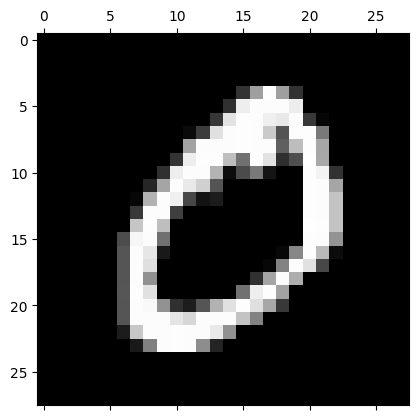

In [8]:
plt.matshow(x_train[1], cmap="gray")

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:

model = keras.Sequential([ # The model starts with a Flatten layer to prepare the input.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\Nirmal Kumar\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7347 - loss: 1.0321 - val_accuracy: 0.9022 - val_loss: 0.3559
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9014 - loss: 0.3532 - val_accuracy: 0.9188 - val_loss: 0.2910
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9164 - loss: 0.2953 - val_accuracy: 0.9266 - val_loss: 0.2615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2623 - val_accuracy: 0.9328 - val_loss: 0.2378
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9323 - loss: 0.2395 - val_accuracy: 0.9359 - val_loss: 0.2201
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9392 - loss: 0.2201 - val_accuracy: 0.9404 - val_loss: 0.2062
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9412 - loss: 0.2106 - val_accuracy: 0.9438 - val_loss: 0.1943
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9443 - loss: 0.193

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9447 - loss: 0.1907
Loss=0.164
Accuracy=0.953


In [16]:
import random

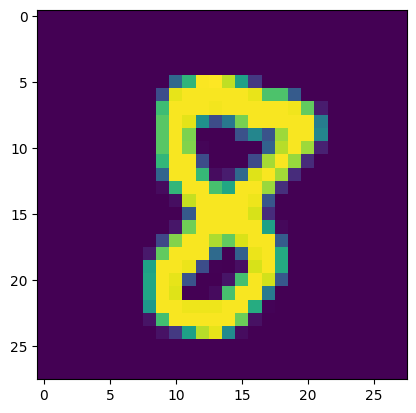

In [17]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [26]:
import numpy as np
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
Handwritten number in the image is= 2


array([7.3569576e-04, 5.1848765e-05, 9.8302585e-01, 1.1944106e-02,
       2.3182066e-08, 2.1494590e-03, 7.9942559e-04, 1.5041877e-08,
       1.2933793e-03, 1.5824493e-07], dtype=float32)

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Training Accuracy

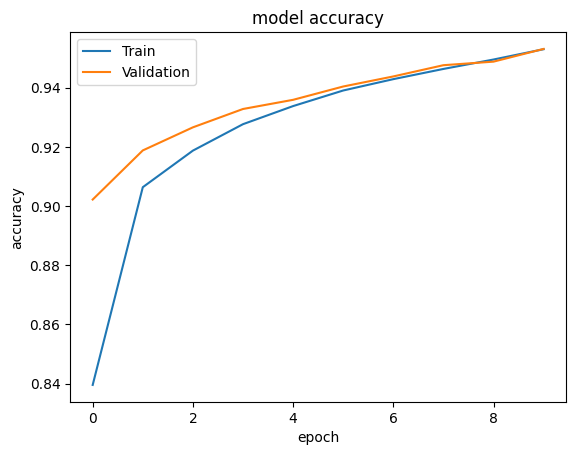

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

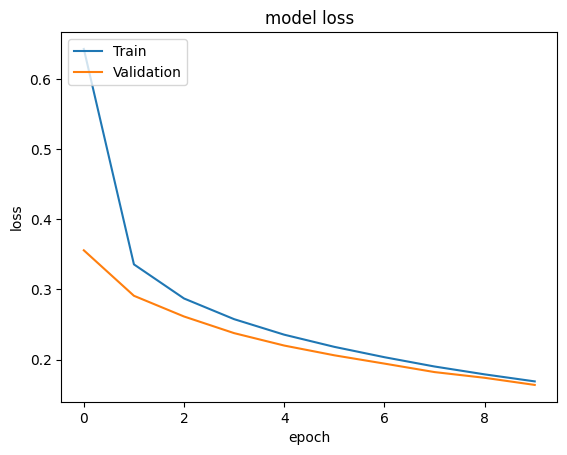

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()